In [1]:
#Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetic_data.csv")


In [3]:
df.keys()

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
df.shape

(101766, 50)

In [5]:
df.readmitted[0]

'NO'

In [6]:
#df.readmitted[0].reshape(50,50)

In [7]:
df.readmitted[50]

'<30'

In [8]:
#dropping columns with large number of missing values
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [9]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

In [10]:
df = df.drop(['citoglipton', 'examide'], axis = 1)

In [11]:
#Checking for missing values in the data
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())
            
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())   

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 0


In [12]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [13]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
    
df['numchange'].value_counts()  

0    70142
1    24922
2     1271
3      106
4        5
Name: numchange, dtype: int64

In [14]:
# re-encoding admission type, discharge type and admission source into fewer categories

df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

In [15]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

In [16]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

In [17]:
# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: age, dtype: int64

In [18]:
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape
(70442, 55)

(70442, 55)

In [19]:
df.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,0,0,1,1,1
age,2,3,4,5,6
admission_type_id,1,1,1,1,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,1
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31


In [20]:
df['readmitted'].value_counts()

NO     50731
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [21]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

In [22]:
# Creating additional columns for diagnosis# Creati 
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']

In [23]:
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)

In [24]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [25]:
for index, row in df.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        df.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        df.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        df.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        df.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        df.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        df.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        df.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        df.loc[index, 'level1_diag1'] = 8
    else:
        df.loc[index, 'level1_diag1'] = 0
        
    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        df.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        df.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        df.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        df.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        df.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        df.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        df.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        df.loc[index, 'level1_diag2'] = 8
    else:
        df.loc[index, 'level1_diag2'] = 0
    
    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        df.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        df.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        df.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        df.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        df.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        df.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        df.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        df.loc[index, 'level1_diag3'] = 8
    else:
        df.loc[index, 'level1_diag3'] = 0

In [26]:
for index, row in df.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        df.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        df.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        df.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        df.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        df.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        df.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        df.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        df.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        df.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        df.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        df.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        df.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        df.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        df.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        df.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        df.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        df.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        df.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        df.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        df.loc[index, 'level2_diag1'] = 22
    else:
        df.loc[index, 'level2_diag1'] = 0
        
    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        df.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        df.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        df.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        df.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        df.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        df.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        df.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        df.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        df.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        df.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        df.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        df.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        df.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        df.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        df.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        df.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        df.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        df.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        df.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        df.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        df.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        df.loc[index, 'level2_diag2'] = 22
    else:
        df.loc[index, 'level2_diag2'] = 0
        
        
    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        df.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        df.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        df.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        df.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        df.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        df.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        df.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        df.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        df.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        df.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        df.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        df.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        df.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        df.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        df.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        df.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        df.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        df.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        df.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        df.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        df.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        df.loc[index, 'level2_diag3'] = 22
    else:
        df.loc[index, 'level2_diag3'] = 0

In [27]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: age, dtype: int64
75    24815
65    21521
55    16546
85    16223
45     9208
35     3538
95     2594
25     1471
15      466
5        64
Name: age, dtype: int64


In [28]:
# convert data type of nominal features in dataframe to 'object' type
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'age', 'A1Cresult', 'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3']

df[i] = df[i].astype('object')

In [29]:
df.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [30]:
df['nummed'] = 0

for col in keys:
    df['nummed'] = df['nummed'] + df[col]
df['nummed'].value_counts()

1    44589
0    22156
2    20901
3     7448
4     1290
5       57
6        5
Name: nummed, dtype: int64

In [31]:
# get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['number_diagnoses',
 'number_inpatient',
 'num_lab_procedures',
 'time_in_hospital',
 'numchange',
 'service_utilization',
 'number_emergency',
 'number_outpatient',
 'num_procedures',
 'num_medications']

In [32]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)
    
    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [33]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,number_diagnoses,-0.807741,-0.372558,1.836659,No,NA,-0.807741,-0.372558,1.836659
1,number_inpatient,3.566269,20.044813,1.269975,Yes,log1p,1.425127,1.319186,0.513389
2,num_lab_procedures,-0.240626,-0.253275,19.656782,No,NA,-0.240626,-0.253275,19.656782
3,time_in_hospital,1.127510,0.839050,2.982330,No,NA,1.127510,0.839050,2.982330
4,numchange,1.426548,1.451898,0.488614,No,NA,1.426548,1.451898,0.488614
5,service_utilization,5.312374,67.194018,2.315789,Yes,log1p,1.097244,0.497241,0.665656
6,number_emergency,22.695921,1165.140400,0.948089,Yes,log1p,3.614471,15.854105,0.318742
7,number_outpatient,8.767489,146.244961,1.280061,Yes,log1p,2.708627,7.648535,0.432949
8,num_procedures,1.313236,0.856100,1.703183,No,NA,1.313236,0.856100,1.703183
9,num_medications,1.339187,3.549325,8.072516,No,NA,1.339187,3.549325,8.072516


In [34]:
 #performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [35]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)

In [36]:
df.shape

(96446, 54)

In [37]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
numerics

['number_diagnoses',
 'service_utilization_log1p',
 'number_inpatient_log1p',
 'number_outpatient_log1p',
 'num_lab_procedures',
 'time_in_hospital',
 'numchange',
 'number_emergency_log1p',
 'num_procedures',
 'num_medications']

In [38]:
# show list of features that are categorical
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
df[i] = df[i].astype('int64')

df.dtypes

encounter_id                   int64
patient_nbr                    int64
race                          object
gender                        object
age                           object
admission_type_id             object
discharge_disposition_id      object
admission_source_id           object
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                      int64
metformin                      int64
repaglinide                    int64
nateglinide                    int64
chlorpropamide                 int64
glimepiride                    int64
acetohexamide                  int64
glipizide                      int64
glyburide                      int64
tolbutamide                    int64
p

In [39]:
dfcopy = df.copy(deep = True)

In [40]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [41]:
# drop individual diagnosis columns that have too granular disease information
# also drop level 2 categorization (which was not comparable with any reference)
# also drop level 1 secondary and tertiary diagnoses
df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [42]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [43]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [44]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8
5,16,3,48


In [45]:
# Feature Scaling
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

In [46]:
# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(67580, 55)

In [47]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [48]:
df2[numerics] = standardize(df2[numerics])
import scipy as sp
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

C:\Users\Ashwini\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [49]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)
just_dummies = pd.get_dummies(df_pd['race'])
df_pd = pd.concat([df_pd, just_dummies], axis=1)      
df_pd.drop(['race'], inplace=True, axis=1)

In [50]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [51]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['insulin',
 'troglitazone',
 'A1Cresult',
 'num_medications|numchange',
 'repaglinide',
 'miglitol',
 'tolazamide',
 'num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'number_emergency_log1p',
 'acetohexamide',
 'glyburide',
 'num_medications|num_lab_procedures',
 'chlorpropamide',
 'number_diagnoses|time_in_hospital',
 'time_in_hospital',
 'nateglinide',
 'time_in_hospital|num_lab_procedures',
 'glimepiride',
 'metformin-rosiglitazone',
 'num_procedures',
 'metformin',
 'service_utilization_log1p',
 'tolbutamide',
 'glyburide-metformin',
 'number_outpatient_log1p',
 'diabetesMed',
 'glipizide-metformin',
 'change|num_medications',
 'glipizide',
 'metformin-pioglitazone',
 'number_diagnoses',
 'rosiglitazone',
 'encounter_id',
 'number_inpatient_log1p',
 'num_lab_procedures',
 'glimepiride-pioglitazone',
 'patient_nbr',
 'numchange',
 'num_medications|number_diagnoses',
 'acarbose',
 'pioglitazone',
 'num_medications']

In [52]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

In [53]:
new_non_num_cols

['gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_0',
 'max_glu_serum_1',
 'A1Cresult_0',
 'A1Cresult_1',
 'level1_diag1_1.0',
 'level1_diag1_2.0',
 'level1_diag1_3.0',
 'level1_diag1_4.0',
 'level1_diag1_5.0',
 'level1_diag1_6.0',
 'level1_diag1_7.0',
 'level1_diag1_8.0']

In [54]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

In [55]:
df_pd.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
age,15,25,35,45,55
time_in_hospital,-0.444872,-0.784109,-0.784109,-1.12335,-0.444872
num_lab_procedures,0.803605,-1.60206,0.0518349,0.402661,-0.5997
...,...,...,...,...,...
AfricanAmerican,0,1,0,0,0
Asian,0,0,0,0,0
Caucasian,1,0,1,1,1
Hispanic,0,0,0,0,0


In [56]:
feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_9', 'max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_0',
                 'A1Cresult_1', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange', 'level1_diag1_1.0', 'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0',
                 'level1_diag1_5.0','level1_diag1_6.0', 'level1_diag1_7.0', 'level1_diag1_8.0']

In [57]:
df = pd.DataFrame(feature_set)

In [58]:
X = df_pd[feature_set]
y = df_pd['readmitted']

In [59]:
df_pd['readmitted'].value_counts()

0    54635
1     5071
Name: readmitted, dtype: int64

In [60]:
X.describe()

,time_in_hospital,num_procedures,num_medications,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p,number_diagnoses,metformin,repaglinide,nateglinide,...,number_diagnoses|time_in_hospital,num_medications|numchange,level1_diag1_1.0,level1_diag1_2.0,level1_diag1_3.0,level1_diag1_4.0,level1_diag1_5.0,level1_diag1_6.0,level1_diag1_7.0,level1_diag1_8.0
count,59706.000000,59706.000000,59706.000000,59706.000000,59706.000000,59706.000000,59706.000000,59706.000000,59706.000000,59706.000000,...,59706.000000,59706.000000,59706.000000,59706.000000,59706.000000,59706.000000,59706.000000,59706.000000,59706.000000,59706.000000
mean,-0.064608,-0.024084,-0.087983,-0.152292,-0.110736,-0.153828,-0.035697,0.207751,0.012578,0.007168,...,31.112736,3.980303,0.305497,0.138278,0.095150,0.074297,0.067012,0.059257,0.050698,0.038656
std,0.933791,0.979795,0.865621,0.642877,0.666823,0.641854,1.006134,0.405701,0.111446,0.084363,...,24.038059,8.185999,0.460621,0.345194,0.293424,0.262256,0.250044,0.236107,0.219383,0.192776
min,-1.123345,-0.816784,-1.787867,-0.356703,-0.267921,-0.349835,-2.291443,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.784109,-0.816784,-0.698365,-0.356703,-0.267921,-0.349835,-0.704844,0.000000,0.000000,0.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.444872,-0.248070,-0.214142,-0.356703,-0.267921,-0.349835,0.352888,0.000000,0.000000,0.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.572837,0.320645,0.391137,-0.356703,-0.267921,-0.349835,0.881754,0.000000,0.000000,0.000000,...,45.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.947491,2.595502,2.933308,2.503618,2.718056,1.947984,2.997219,1.000000,1.000000,1.000000,...,156.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
y

1         0
2         0
3         0
4         0
5         0
         ..
101753    0
101754    0
101756    0
101758    0
101765    0
Name: readmitted, Length: 59706, dtype: int64

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-3.25769087, -0.4072301 , -0.80905444, ..., -0.2509773 ,
        -0.23109743, -0.20052546],
       [-2.61732421, -0.77052264,  2.09318204, ..., -0.2509773 ,
        -0.23109743, -0.20052546],
       [-1.97695754, -0.77052264, -0.22860714, ..., -0.2509773 ,
        -0.23109743, -0.20052546],
       ...,
       [-0.05585753, -0.77052264,  2.67362934, ..., -0.2509773 ,
        -0.23109743, -0.20052546],
       [ 1.22487581,  0.31935499, -0.22860714, ..., -0.2509773 ,
        -0.23109743, -0.20052546],
       [ 0.58450914,  0.68264754,  0.93228745, ..., -0.2509773 ,
        -0.23109743, -0.20052546]])

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)



## logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)



0.9128286719142522

In [65]:
X.shape

(59706, 57)

In [66]:
from sklearn.decomposition import PCA

pca = PCA(7)

X_pca = pca.fit_transform(X)
X_pca.shape

(59706, 7)

In [67]:
X_pca

array([[ 346.23012279,  387.78409506,  -91.61514494, ...,  -56.38339459,
         -52.14851956,    4.07568427],
       [-575.72805067,  290.11142203,    7.1206323 , ...,   31.12920639,
         -31.3390103 ,   -8.42905002],
       [ -15.77352053,  251.15263054,  -90.76301968, ...,  -19.76399355,
         -22.42230041,    8.52569289],
       ...,
       [  92.16404827,  -79.33816458, -148.40447533, ...,   66.33693929,
         -25.23611499,   -8.35542498],
       [1038.2974591 , -185.74893899, -119.95055748, ...,  -15.17075353,
           2.3310025 ,   14.70899977],
       [-625.68364288, -240.68590945,   45.17866696, ...,   22.04841883,
          28.25438778,   -8.93405616]])

In [68]:
pca.explained_variance_ratio_

array([8.44938444e-01, 9.72468542e-02, 4.47433989e-02, 8.46404381e-03,
       2.43542951e-03, 1.44042972e-03, 2.95110161e-04])

In [69]:
pca.n_components_

7

In [72]:
X_train_pca, X_test_pca, y_train, y_test= train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [73]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)


0.9128286719142522

In [74]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(59706, 2)

In [75]:
X_pca

array([[ 346.23012279,  387.78409506],
       [-575.72805067,  290.11142203],
       [ -15.77352053,  251.15263054],
       ...,
       [  92.16404827,  -79.33816458],
       [1038.2974591 , -185.74893899],
       [-625.68364288, -240.68590945]])

In [76]:
pca.explained_variance_ratio_

array([0.84493844, 0.09724685])

In [77]:
X_train_pca, X_test_pca, y_train, y_test= train_test_split(X_pca, y, test_size=0.2, random_state=30)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9128286719142522

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

## Decision tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.8701222575782951

In [80]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(59706, 2)

In [81]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

X_pca = pca.fit_transform(X)
X_pca.shape

(59706, 3)

In [82]:
X_train_pca, X_test_pca, y_train, y_test= train_test_split(X_pca, y, test_size=0.2, random_state=30)
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train_pca, y_train)
dtree.score(X_test_pca, y_test)

0.888460894322559

## Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)
rm.score(X_test, y_test)

0.9127449338469268

In [84]:
X_train_pca, X_test_pca, y_train, y_test= train_test_split(X_pca, y, test_size=0.2, random_state=30)
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train_pca, y_train)
rm.score(X_test_pca, y_test)

0.912577457712276

## SVM

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
svc.score(X_test, y_test)

0.9141916033943724

In [86]:
X_train_pca, X_test_pca, y_train, y_test= train_test_split(X_pca, y, test_size=0.2, random_state=30)
svc=SVC() #Default hyperparameters
svc.fit(X_train_pca, y_train)
svc.score(X_test_pca, y_test)

0.9128286719142522

In [87]:
pca = PCA(3)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)
print(df_pd.shape)
print(projected.shape)

(59706, 81)
(59706, 3)


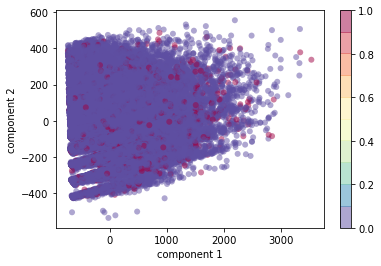

In [88]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=df_pd.readmitted, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-3.25769087, -0.4072301 , -0.80905444, ..., -0.2509773 ,
        -0.23109743, -0.20052546],
       [-2.61732421, -0.77052264,  2.09318204, ..., -0.2509773 ,
        -0.23109743, -0.20052546],
       [-1.97695754, -0.77052264, -0.22860714, ..., -0.2509773 ,
        -0.23109743, -0.20052546],
       ...,
       [-0.05585753, -0.77052264,  2.67362934, ..., -0.2509773 ,
        -0.23109743, -0.20052546],
       [ 1.22487581,  0.31935499, -0.22860714, ..., -0.2509773 ,
        -0.23109743, -0.20052546],
       [ 0.58450914,  0.68264754,  0.93228745, ..., -0.2509773 ,
        -0.23109743, -0.20052546]])

In [96]:
np.mean(X),np.std(X)

(age                                     65.872274
 time_in_hospital                        -0.064608
 num_procedures                          -0.024084
 num_medications                         -0.087983
 number_outpatient_log1p                 -0.152292
 number_emergency_log1p                  -0.110736
 number_inpatient_log1p                  -0.153828
 number_diagnoses                        -0.035697
 metformin                                0.207751
 repaglinide                              0.012578
 nateglinide                              0.007168
 chlorpropamide                           0.001072
 glimepiride                              0.051452
 glipizide                                0.124577
 glyburide                                0.108549
 pioglitazone                             0.073158
 rosiglitazone                            0.065370
 acarbose                                 0.002529
 tolazamide                               0.000452
 insulin                       

In [97]:
## Let's convert the normalized features into a tabular format with the help of DataFrame.

In [98]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]

In [99]:
normalised_df = pd.DataFrame(X,columns=feat_cols)

In [100]:
normalised_df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
from sklearn.decomposition import PCA
pca_df = PCA(n_components=2)
principalComponents_df = pca_df.fit_transform(X)

In [102]:
principal_df = pd.DataFrame(data = principalComponents_df
             , columns = ['principal component 1', 'principal component 2'])

In [103]:
principal_df.tail()

,principal component 1,principal component 2
59701,128.871241,37.434863
59702,1060.272491,-122.637142
59703,92.164048,-79.338165
59704,1038.297459,-185.748939
59705,-625.683643,-240.685909


In [104]:
print('Explained variation per principal component: {}'.format(pca_df.explained_variance_ratio_))

Explained variation per principal component: [0.84493844 0.09724685]


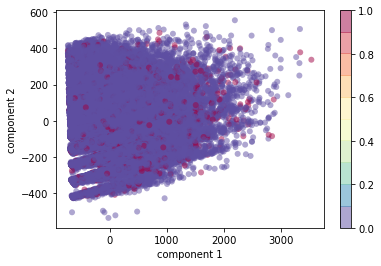

In [105]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=df_pd.readmitted, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## ANN

In [106]:
#X_train_pca, X_test_pca, y_train, y_test= train_test_split(X_pca, y, test_size=0.2, random_state=30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)


In [107]:
X_train.shape

(47764, 57)

In [108]:
X_test.shape

(11942, 57)

In [109]:
X_train[:10]

array([[-6.96224198e-01,  6.82647540e-01, -2.28607145e-01,
        -8.44993067e-01,  2.48922156e+00,  4.24222821e+00,
         3.27462203e+00, -1.19071962e+00, -5.12083906e-01,
        -1.12865094e-01, -8.49718577e-02, -3.27577367e-02,
         4.29366357e+00, -3.77233407e-01, -3.48949978e-01,
        -2.80950355e-01,  3.78119868e+00, -5.03534648e-02,
        -2.12701775e-02,  1.01695952e+00, -8.44705063e-02,
         2.07039219e+00, -8.62621246e-02, -1.80424274e+00,
        -1.46827659e-01, -1.32883737e-01,  1.06986544e+00,
        -4.95017401e-01, -3.48949978e-01, -4.85951714e-01,
        -7.57900081e-02, -2.86594159e-02, -2.26394593e-01,
        -2.62722165e-01,  9.20013607e-01, -2.72000248e-01,
        -1.55859974e-01, -1.51520862e-01, -2.42225791e-01,
        -3.76102835e-01, -2.30592876e-01, -4.28828554e-01,
         7.60393951e-01, -3.39532720e-01, -1.02569730e+00,
        -1.15216941e+00,  1.72579444e-01, -4.62909691e-02,
        -4.86237139e-01, -6.63233333e-01, -4.00582666e-0

In [110]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(30, input_shape=(57,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
    
    
])



model.compile(optimizer ='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2996 - accuracy: 0.9115
Epoch 2/100
1493/1493 [==============================] - 1s 888us/step - loss: 0.2829 - accuracy: 0.9156
Epoch 3/100
1493/1493 [==============================] - 2s 2ms/step - loss: 0.2803 - accuracy: 0.9156
Epoch 4/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2785 - accuracy: 0.9156
Epoch 5/100
1493/1493 [==============================] - 2s 1ms/step - loss: 0.2771 - accuracy: 0.9156
Epoch 6/100
1493/1493 [==============================] - 1s 887us/step - loss: 0.2760 - accuracy: 0.91560s - loss: 0
Epoch 7/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2745 - accuracy: 0.9156
Epoch 8/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9155
Epoch 9/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2722 - accuracy: 0.9155
Epoch 10/100
1493/1493 [==============================] -

1493/1493 [==============================] - 3s 2ms/step - loss: 0.2484 - accuracy: 0.9201
Epoch 80/100
1493/1493 [==============================] - 2s 1ms/step - loss: 0.2482 - accuracy: 0.9198
Epoch 81/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2482 - accuracy: 0.9201
Epoch 82/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2483 - accuracy: 0.9199
Epoch 83/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2482 - accuracy: 0.9195
Epoch 84/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2478 - accuracy: 0.9197
Epoch 85/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2482 - accuracy: 0.9195: 0s - loss: 0.2485 - accuracy: 0.
Epoch 86/100
1493/1493 [==============================] - 1s 883us/step - loss: 0.2477 - accuracy: 0.9200
Epoch 87/100
1493/1493 [==============================] - 2s 1ms/step - loss: 0.2476 - accuracy: 0.9200: 0s -
Epoch 88/100
1493/1493 [===========

In [111]:
yp = model.predict(X_test)
yp[:5]

array([[0.2561291 ],
       [0.0111267 ],
       [0.04761866],
       [0.02079239],
       [0.01674893]], dtype=float32)

In [112]:
y_test[:5]

8466     0
27610    1
53886    0
3437     0
8936     0
Name: readmitted, dtype: int64

In [113]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
            y_pred.append(0)

In [114]:
from sklearn.metrics import confusion_matrix,  classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10901
           1       0.19      0.02      0.04      1041

    accuracy                           0.91     11942
   macro avg       0.55      0.51      0.50     11942
weighted avg       0.85      0.91      0.87     11942



Text(69.0, 0.5, 'Truth')

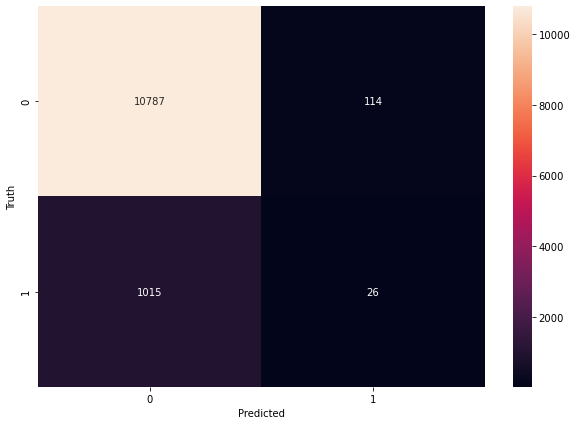

In [115]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Accuracy

In [116]:
round((10780+22)/(10780+22+121+1019),2)

0.9

#### Precision for 1 class i.e. Precision for diabetes

In [117]:
round(22/(22+121),2)

0.15

#### recall for 0 class

In [118]:
round(10780/(10780+121),2)

0.99

In [119]:
round(22/(22+1019),2)

0.02

In [120]:
df.keys()

RangeIndex(start=0, stop=1, step=1)

Text(0, 0.5, 'Second Principal Component')

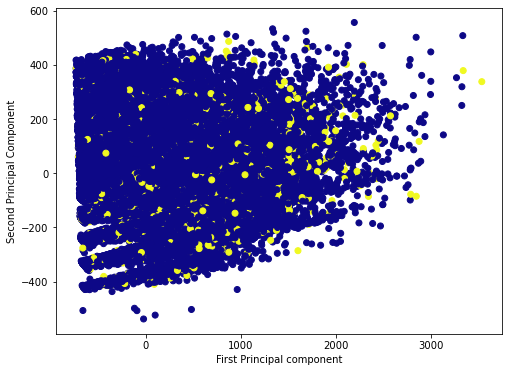

In [121]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=df_pd['readmitted'],cmap='plasma')
plt.xlabel('First Principal component')
plt.ylabel('Second Principal Component')

## KNN 

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [124]:
X,Y=make_classification(n_samples= 200,n_features=3,n_informative=3,n_redundant=0,n_repeated=0,n_classes=2,random_state=14)
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2,random_state=32)
sc= StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
sc.fit(X_test)
X_test= sc.transform(X_test)
X.shape

(200, 3)

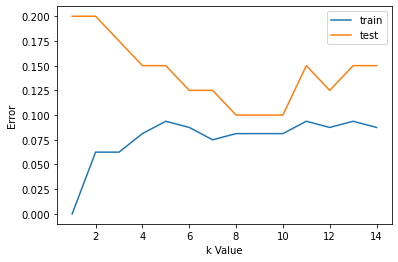

In [125]:
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [126]:
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.875

In [127]:
X_train_pca, X_test_pca, y_train, y_test= train_test_split(X_pca, y, test_size=0.2, random_state=30)
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)
#metrics.accuracy_score(y_test, y_pred)

0.9119912912409982

## Logistic Regression

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [129]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)



0.9128286719142522

In [130]:
# Predict the labels of the test data: y_pred
y_pred = model.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10901     0]
 [ 1041     0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10901
           1       0.00      0.00      0.00      1041

    accuracy                           0.91     11942
   macro avg       0.46      0.50      0.48     11942
weighted avg       0.83      0.91      0.87     11942



C:\Users\Ashwini\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ashwini\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ashwini\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

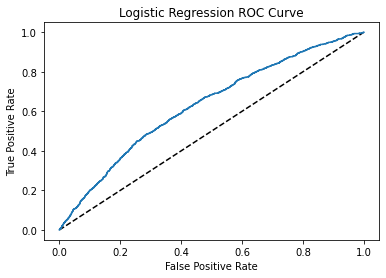

In [132]:
# Compute predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values (false positive rate, true positive rate, thresholds)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

## Decision tree

In [133]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.8679450678278345

In [134]:
# Predict the labels of the test data: y_pred
y_pred = dtree.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10279   622]
 [  955    86]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     10901
           1       0.12      0.08      0.10      1041

    accuracy                           0.87     11942
   macro avg       0.52      0.51      0.51     11942
weighted avg       0.85      0.87      0.86     11942



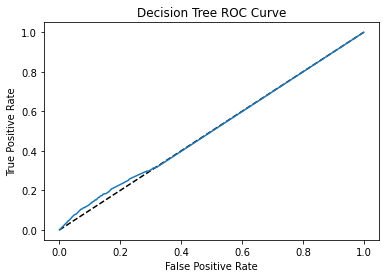

In [135]:
# Compute predicted probabilities
y_pred_prob = dtree.predict_proba(X_test)[:,1]

# Generate ROC curve values (false positive rate, true positive rate, thresholds)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()

# KNN

In [136]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [138]:
#Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [139]:
#Loop over different values of k
for i, k in enumerate(neighbors):
    
    # Setup a k-NN Classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

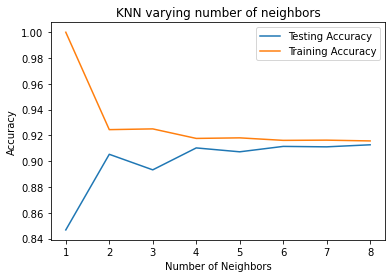

In [140]:
#Generate plot
_ = plt.title('KNN varying number of neighbors')
_ = plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
_ = plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [141]:
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10900     1]
 [ 1041     0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10901
           1       0.00      0.00      0.00      1041

    accuracy                           0.91     11942
   macro avg       0.46      0.50      0.48     11942
weighted avg       0.83      0.91      0.87     11942



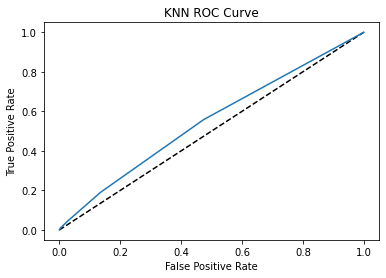

In [142]:
# Compute predicted probabilities
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values (false positive rate, true positive rate, thresholds)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()

## Random forest

In [143]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)
rm.score(X_test, y_test)

0.912577457712276

In [144]:
# Predict the labels of the test data: y_pred
y_pred = rm.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10897     4]
 [ 1040     1]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10901
           1       0.20      0.00      0.00      1041

    accuracy                           0.91     11942
   macro avg       0.56      0.50      0.48     11942
weighted avg       0.85      0.91      0.87     11942



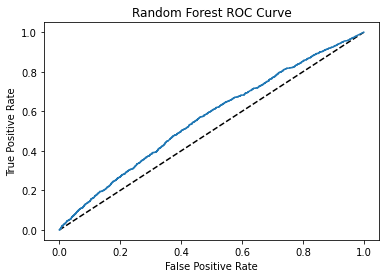

In [145]:
# Compute predicted probabilities
y_pred_prob = rm.predict_proba(X_test)[:,1]

# Generate ROC curve values (false positive rate, true positive rate, thresholds)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

In [146]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test= train_test_split(X_pca, y, test_size=0.2, random_state=30)
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
svc.score(X_test, y_test)

0.9128286719142522

In [147]:
# Predict the labels of the test data: y_pred
y_pred = svc.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10901     0]
 [ 1041     0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10901
           1       0.00      0.00      0.00      1041

    accuracy                           0.91     11942
   macro avg       0.46      0.50      0.48     11942
weighted avg       0.83      0.91      0.87     11942



C:\Users\Ashwini\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ashwini\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ashwini\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
X_train_pca, X_test_pca, y_train, y_test= train_test_split(X_pca, y, test_size=0.2, random_state=30)
from sklearn.model_selection import train_test_split

In [149]:
X_test_pca.shape

(11942, 3)

In [150]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(30, input_shape=(57,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
    
    
])



model.compile(optimizer ='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2996 - accuracy: 0.9106
Epoch 2/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2828 - accuracy: 0.9156
Epoch 3/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2804 - accuracy: 0.9156
Epoch 4/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2787 - accuracy: 0.9156
Epoch 5/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2772 - accuracy: 0.9156
Epoch 6/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2760 - accuracy: 0.9155
Epoch 7/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2748 - accuracy: 0.9158
Epoch 8/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2736 - accuracy: 0.9159
Epoch 9/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2723 - accuracy: 0.9157
Epoch 10/100
1493/1493 [==============================] - 3s 2ms/step - l

1493/1493 [==============================] - 3s 2ms/step - loss: 0.2470 - accuracy: 0.9196
Epoch 80/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2466 - accuracy: 0.9198
Epoch 81/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2469 - accuracy: 0.9200
Epoch 82/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2470 - accuracy: 0.9199
Epoch 83/100
1493/1493 [==============================] - 2s 2ms/step - loss: 0.2464 - accuracy: 0.9202
Epoch 84/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2463 - accuracy: 0.9200
Epoch 85/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2465 - accuracy: 0.9201
Epoch 86/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2460 - accuracy: 0.9199
Epoch 87/100
1493/1493 [==============================] - 3s 2ms/step - loss: 0.2458 - accuracy: 0.9204
Epoch 88/100
1493/1493 [==============================] - 3s 2ms/step - loss: